<a href="https://colab.research.google.com/github/Yomicharles/4B4b_testing/blob/main/chatbot_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [390]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder
import numpy as np
import seaborn as sns
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import save_model, load_model
import json
import random
import time


In [378]:
# Create a DataFrame
training_data = pd.DataFrame({'patterns': patterns, 'tags': tags, 'context': [context_dict.get(tag,None) for tag in tags]})


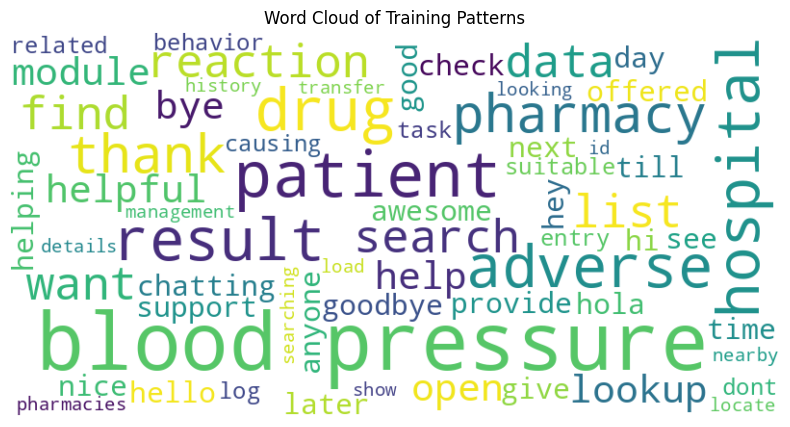

In [391]:
from wordcloud import WordCloud

all_patterns = ' '.join(training_data['patterns'])
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_patterns)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Training Patterns')
plt.show()

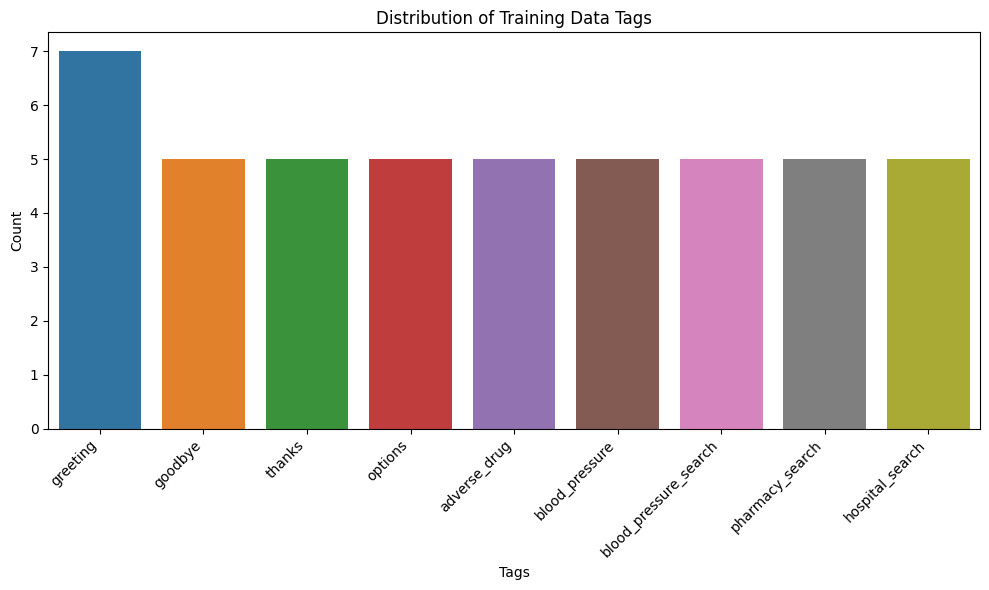

In [392]:
# Create a countplot using seaborn
plt.figure(figsize=(10, 6))
sns.countplot(data=training_data, x="tags")
plt.xlabel("Tags")
plt.ylabel("Count")
plt.title("Distribution of Training Data Tags")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()

chat box creation

In [379]:

# Preprocessing training data
training_data["patterns"] = training_data["patterns"].str.lower()
vectorizer = TfidfVectorizer(ngram_range=(1, 2), stop_words="english")
training_data_tfidf = vectorizer.fit_transform(training_data["patterns"]).toarray()


In [380]:
# Preprocessing target variable(tags)
le = LabelEncoder()
training_data_tags_le = pd.DataFrame({"tags": le.fit_transform(training_data["tags"])})
training_data_tags_dummy_encoded = pd.get_dummies(training_data_tags_le["tags"]).to_numpy()


In [381]:
# Creating DNN
intents = Sequential()
intents.add(Dense(10, input_shape=(len(training_data_tfidf[0]),)))
intents.add(Dense(8))
intents.add(Dense(8))
intents.add(Dense(6))
intents.add(Dense(len(training_data_tags_dummy_encoded[0]), activation="softmax"))
intents.compile(optimizer="rmsprop", loss="categorical_crossentropy", metrics=["accuracy"])

# Fitting DNN
intents.fit(training_data_tfidf, training_data_tags_dummy_encoded, epochs=50, batch_size=32)

# Saving model file
save_model(intents, "intents_v2")


Epoch 1/50
2/2 [==============================] - 1s 17ms/step - loss: 2.2078 - accuracy: 0.1277
Epoch 2/50
2/2 [==============================] - 0s 7ms/step - loss: 2.1895 - accuracy: 0.1915
Epoch 3/50
2/2 [==============================] - 0s 8ms/step - loss: 2.1779 - accuracy: 0.2340
Epoch 4/50
2/2 [==============================] - 0s 10ms/step - loss: 2.1683 - accuracy: 0.2128
Epoch 5/50
2/2 [==============================] - 0s 7ms/step - loss: 2.1589 - accuracy: 0.2340
Epoch 6/50
2/2 [==============================] - 0s 8ms/step - loss: 2.1513 - accuracy: 0.2553
Epoch 7/50
2/2 [==============================] - 0s 7ms/step - loss: 2.1421 - accuracy: 0.2553
Epoch 8/50
2/2 [==============================] - 0s 10ms/step - loss: 2.1339 - accuracy: 0.2766
Epoch 9/50
2/2 [==============================] - 0s 8ms/step - loss: 2.1258 - accuracy: 0.2766
Epoch 10/50
2/2 [==============================] - 0s 8ms/step - loss: 2.1176 - accuracy: 0.3191
Epoch 11/50
2/2 [===================

In [382]:
# Load model
chatbot = load_model("intents_v2")

In [385]:
# Transform input and predict intent
# current_context = None
def predict_tag(inp_str):
    inp_data_tfidf = vectorizer.transform([inp_str.lower()]).toarray()
    predicted_proba = intents.predict(inp_data_tfidf)
    encoded_label = [np.argmax(predicted_proba)]
    predicted_tag = le.inverse_transform(encoded_label)[0]
    intent = [intent for intent in intents_data['intents'] if intent['tag'] == predicted_tag][0]
    predicted_context = intent.get('context', [None])[0]  # Get the first context from the intent
    return predicted_tag, predicted_context


In [389]:
# defining chat function
def start_chat():
    print("---------------  AI Chat bot  ---------------")
    print("---------------  Hospital Chatbot  ---------------")
    print("Welcome to the hospital chatbot!")
    print("Feel free to ask any questions. Type 'EXIT' to quit.")
    print("Type EXIT to quit...")

    current_context = None  # Initialize the context

    while True:
        inp = input("Ask anything... : ")
        if inp == "EXIT":
            break
        else:
            if inp:
                tag, predicted_context = predict_tag(inp)
                intent = [intent for intent in intents_data['intents'] if intent['tag'] == tag][0]

                # Check if the intent has a context and if it matches the current context
                if predicted_context and predicted_context[0] == current_context:
                    response = predicted_context[1]  # Use the context response
                    current_context = None  # Clear the context after using it
                else:
                    response = random.choice(intent['responses'])
                    current_context = predicted_context  # Set the context for the next interaction
                print("Response... : ", response)
            else:
                pass


# calling chat function to start chatting
start_chat()



---------------  AI Chat bot  ---------------
---------------  Hospital Chatbot  ---------------
Welcome to the hospital chatbot!
Feel free to ask any questions. Type 'EXIT' to quit.
Type EXIT to quit...
Ask anything... : hi
1/1 [==============================] - 0s 81ms/step
Response... :  Hi there, how can I help?
Ask anything... : need help
1/1 [==============================] - 0s 25ms/step
Response... :  I can guide you through Adverse drug reaction list, Blood pressure tracking, Hospitals and Pharmacies
Ask anything... : Blood pressure tracking
1/1 [==============================] - 0s 25ms/step
Response... :  Patient ID?


KeyboardInterrupt: ignored